### Stock Market Prediction And Forecasting Using Stacked LSTM

In [29]:
### Keras and Tensorflow >2.0

In [30]:
### Data Collection
import pandas_datareader as pdr
key="7c85d3daa2f17e905336e8dcaf6a8d4bf86fd6ce"
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

In [32]:
df.to_csv('AAPL.csv')

In [33]:
import pandas as pd

In [34]:
df=pd.read_csv('AAPL.csv')


In [35]:
df1=df.reset_index()['close']


In [36]:
import matplotlib.pyplot as plt


In [37]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [38]:
import numpy as np

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [40]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
print(X_train.shape), print(y_train.shape)

(842, 100)
(842,)


(None, None)

In [44]:
print(X_test.shape), print(ytest.shape)

(214, 100)
(214,)


(None, None)

In [45]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [46]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 6s 187ms/step - loss: 0.0027 - val_loss: 0.0219
Epoch 2/100
14/14 [=====================

In [49]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [50]:
tf.__version__

'2.5.0'

In [51]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
x=math.sqrt(mean_squared_error(ytest,test_predict))




In [53]:
#Thaazhe olla Value and Graph  print cheyikanam

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error


In [55]:
print("Root Mean Square Value of the Test Data using LSTM \n",math.sqrt(x))
lstmValue = math.sqrt(x)
%store lstmValue

Root Mean Square Value of the Test Data using LSTM 
 26.59272030810204


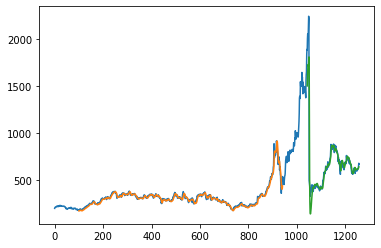

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('TESLA Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.savefig('lstm.png')
plt.show()
